<a href="https://colab.research.google.com/github/eirikngard/Eika/blob/master/vannskade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# Utbetalt, avsluttet, naturskade, alle årsaker
skade = np.array([216597,300000,120736,900000,500000,2881804,600000,476887,
                  1100000,1200000,929431,10490844,8300000,10631701,4029565,
                  7102580,1192431,3706358,2000000,1200000,379981])
år = np.arange(2000,2030,1)

In [13]:
len(år2)


30

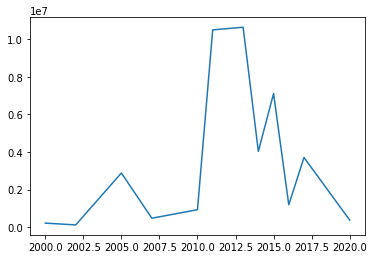

In [11]:
plt.plot(år,skade)
plt.show()

In [12]:
def linreg(X, Y):
    """
    return a,b in solution to y = ax + b such that root mean square distance between trend line and original points is minimized
    """
    N = len(X)
    Sx = Sy = Sxx = Syy = Sxy = 0.0
    for x, y in zip(X, Y):
        Sx = Sx + x
        Sy = Sy + y
        Sxx = Sxx + x*x
        Syy = Syy + y*y
        Sxy = Sxy + x*y
    det = Sxx * N - Sx * Sx
    return (Sxy * N - Sy * Sx)/det, (Sxx * Sy - Sx * Sxy)/det



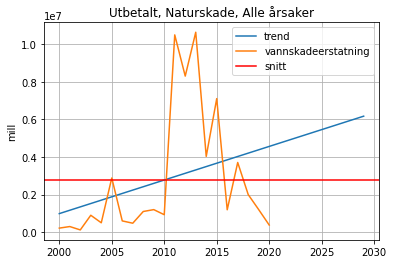

(None, <matplotlib.legend.Legend at 0x7f5b5eb135f8>, None)

In [29]:
#Legger på lineær trend

snitt = np.mean(skade)
a,b = linreg(range(len(skade)),skade)  #//x=skade
extrapolatedtrendline=[a*index + b for index in range(len(år))]

plt.plot(år,extrapolatedtrendline,label="trend")
plt.plot(år[:-9],skade,label="vannskadeerstatning")
plt.axhline(y=snitt,color='r',label='snitt')
plt.title("Utbetalt, Naturskade, Alle årsaker")
plt.ylabel("mill")
plt.grid(),plt.legend(), plt.show()

In [30]:
from google.colab import files
uploaded = files.upload()

Saving vannskade_frost.xlsx to vannskade_frost.xlsx


In [109]:
import pandas as pd

names = ['år','mnd','skade']
frost = pd.read_excel('vannskade_frost.xlsx',header=None,skiprows=3,names=names)#.rename(lambda x: x.replace(' ', '_'), axis=1)

år2 = np.arange(2000,2020,1)
#for i in år2:
frost.loc[frost['år']==2007,'skade'].sum()



8973886.0

In [104]:
skade2

1719910.0